This notebook uses the access library to calculate and plot spatial access metrics for one town in Brazil. 

In [103]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from access import Access, weights, Datasets
# Transforming dataset into geopandas data
import geopandas as gpd
from shapely import wkt



In [104]:
# Importing data
school_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
dem_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dem_census.csv", index_col=0)

In [105]:
dem_census_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,...,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,zone,geometry,microregion_id,microregion_name,mesoregion_id,mesoregion_name
0,170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((4316081.043813151 8936951.569070809,...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
1,170025105000003,TO,59.0,167.0,433.73,0.0,0.0,0.0,0.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((4300023.229366692 8964455.368041243,...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
2,170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((4501590.424471468 9273374.76835, 450...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
3,170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,POLYGON ((4503050.0514419945 9272734.518656082...,17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
4,170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,...,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON ((4502995.959709885 9275774.210479755,...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins


In [95]:
print(dem_census_df.columns)
print(school_census_df.columns)

Index(['sector_id', 'state', 'n_households', 'n_people',
       'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17', 'n_people_15to17_alternative',
       'state_id', 'state_abbrev', 'city_id', 'city_name', 'district_id',
       'district_name', 'subdistrict_id', 'subdistrict_name',
       'neighborhood_name', 'neighborhood_id', 'zone', 'geometry',
       'microregion_id', 'microregion_name', 'mesoregion_id',
       'mesoregion_name'],
      dtype='object')
Index(['region_name', 'region_id', 'state_name', 'state_abbrev', 'state_id',
       'city_name', 'city_id', 'mesoregion_name', 'mesoregion_id',
       'microregion_name', 'microregion_id', 'sector_id', 'school_id',
   

In [106]:
# Only public schools with at least one high school class and regions with at least one high-school aged person
geo_dem_census_df = dem_census_df[dem_census_df["n_people_15to17"] > 0]
geo_school_census_df = school_census_df[(school_census_df["n_classes"] > 0) & (school_census_df["admin_type"] != 4.0)]

In [107]:
# How many geometries are emtpy?
geo_dem_census_df = gpd.GeoDataFrame(geo_dem_census_df, geometry = geo_dem_census_df["geometry"].apply(wkt.loads))
geo_school_census_df = gpd.GeoDataFrame(geo_school_census_df, geometry = geo_school_census_df["geometry"].apply(wkt.loads))




/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geodataframe.py:31: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(np.asarray(data))


In [86]:
dist_matrix = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dist_matrix.csv", index_col=0)
dist_matrix.head()

,origin,dest,euclidean
0,170025105000002,17010535,13894.563390
1,170320605000005,17014298,16119.745299
2,170390905000005,17011736,12566.395935
3,170600105000005,17011787,17742.292778
4,170600105000005,17014298,18544.963646


In [52]:
A = Access(
    demand_df=geo_dem_census_df,
    demand_index="sector_id",
    demand_value="n_people_15to17",
    supply_df=geo_school_census_df,
    supply_index="school_id",
    supply_value=["n_classes", "n_teachers"],
    cost_df=dist_matrix,
    cost_origin="origin",
    cost_dest="dest",
    cost_name="euclidean"
    )

In [53]:
# Defining custom weight functions
#fn30 = weights.step_fn({0: 1, 5000: 0.68, 10000: 0.22, 15000: 0.05})
gaussian = weights.gaussian(5000)   

# Access metrics to calculate
max_cost = 16000
A.two_stage_fca(name="e2sfca", weight_fn=gaussian, cost = "euclidean", max_cost=max_cost)
A.enhanced_two_stage_fca(name="e2sfca", weight_fn=gaussian, cost = "euclidean", max_cost=max_cost)
A.three_stage_fca(name = "3sfca", weight_fn=gaussian, cost = "euclidean", max_cost = max_cost)
# A.enhanced_two_stage_fca(name="g2sfca", weight_fn=gaussian, max_cost=16000)


access INFO     :: Overwriting e2sfca_n_classes.
access INFO     :: Overwriting e2sfca_n_teachers.


,3sfca_n_classes,3sfca_n_teachers
sector_id,,
110001505000001,0.050569,0.081699
110001505000002,0.049551,0.079896
110001505000003,0.049922,0.080502
110001505000004,0.050622,0.081993
110001505000005,0.048824,0.078758
...,...,...
530010805300152,0.013631,0.000000
530010805300153,0.008693,0.000029
530010805300154,0.008116,0.000030


In [30]:
A.access_df.head()

,n_people_15to17,e2sfca_n_classes,3sfca_n_classes
sector_id,,,
110001505000001,52.0,2.655496,2.661904
110001505000002,59.0,2.598333,2.608319
110001505000003,47.0,2.616573,2.627844
110001505000004,21.0,2.660808,2.664740
110001505000005,76.0,2.557766,2.570089


In [108]:
# Merging access metrics to the main dataframe
access_df = geo_dem_census_df.set_index("sector_id").join(A.access_df, how="left", lsuffix="dem", rsuffix="acc")

In [ ]:
# Saving access metrics to a csv file
access_df.to_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/access_df.csv")

In [109]:
access_df.head()

,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,n_people_15,...,geometry,microregion_id,microregion_name,mesoregion_id,mesoregion_name,n_people_15to17acc,e2sfca_n_classes,e2sfca_n_teachers,3sfca_n_classes,3sfca_n_teachers
sector_id,,,,,,,,,,,,,,,,,,,,,
170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,6.0,...,"POLYGON ((4316081.044 8936951.569, 4316439.062...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins,11.0,0.156540,0.334205,0.156540,0.334205
170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,26.0,...,"POLYGON ((4501590.424 9273374.768, 4503952.106...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins,74.0,1.858669,0.272249,1.963982,0.038130
170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,23.0,...,"POLYGON ((4503050.051 9272734.519, 4503294.923...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins,58.0,1.888139,0.310532,1.951083,0.048693
170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,8.0,...,"POLYGON ((4502995.960 9275774.210, 4503071.882...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins,21.0,0.349708,0.044056,0.369478,0.005189
170030105000004,TO,56.0,245.0,368.55,3.0,0.0,0.0,11.0,0.0,6.0,...,"POLYGON ((4498921.648 9273403.237, 4499348.144...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins,14.0,2.043338,0.823609,1.619455,0.304899


In [110]:
def plot(v, il_map, ax=None, leg=True, schools = False, schools_df=None):

    swap_colors = "raam" in v

    base = il_map.plot(
        v,
        legend=leg,
        figsize=(8, 8),
        cmap="viridis_r" if swap_colors else "viridis",
        markersize=5,
        alpha=0.8,
        #vmin=il_map[v].quantile(0.05),
        vmax=il_map[v].quantile(0.95),
        missing_kwds={'color': 'lightgrey'}
    )

    if schools:

        schools_df.plot(ax=base, markersize=10, color="white")
        schools_df.plot(
            ax=base, markersize=4, color="red", edgecolor="white", linewidth=0 , label = "Schools"
        )

    base.set_axis_off()
    base.set_title(v.split("_")[0].upper(), fontsize=20)
    base.legend(loc="best", fontsize=12)


    plt.show()

#make_access_map("Ribeirão Preto")

In [89]:
access_df["microregion_name"]

sector_id
170025105000002    Miracema do Tocantins
170030105000001         Bico do Papagaio
170030105000002         Bico do Papagaio
170030105000003         Bico do Papagaio
170030105000004         Bico do Papagaio
                           ...          
355620605000113                 Campinas
355640405000064    São João da Boa Vista
355640405000070    São João da Boa Vista
355645305000027     Itapecerica da Serra
355680005000031              Jaboticabal
Name: microregion_name, Length: 301567, dtype: object

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:332: UserWarning: The GeoSer

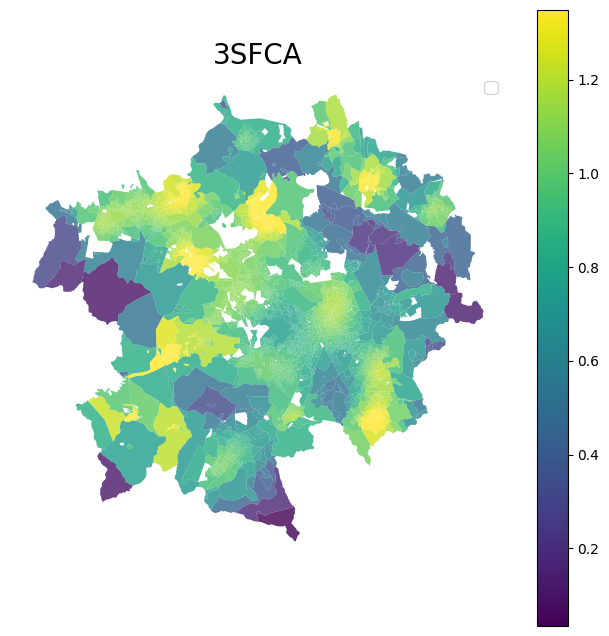

In [116]:
plot("3sfca_n_classes", access_df[access_df["microregion_name"] == "Campinas"], "3sfca_n_classes")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/

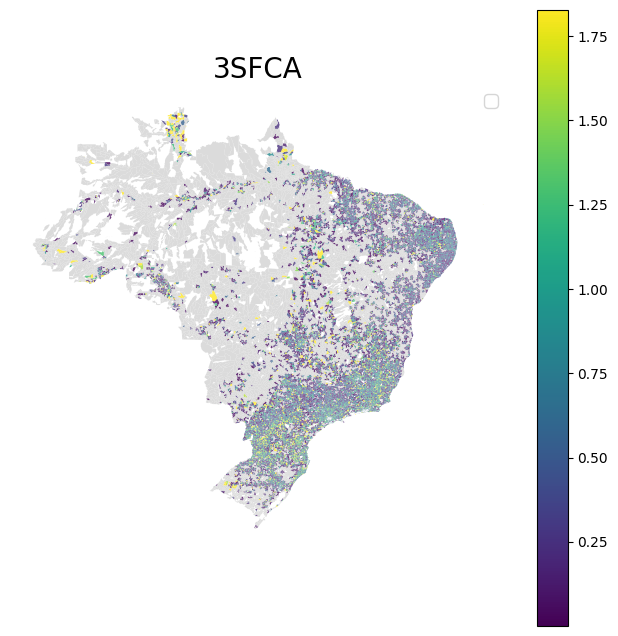

In [75]:
plot("3sfca_n_classes", access_df)

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:332: UserWarning: The GeoSer

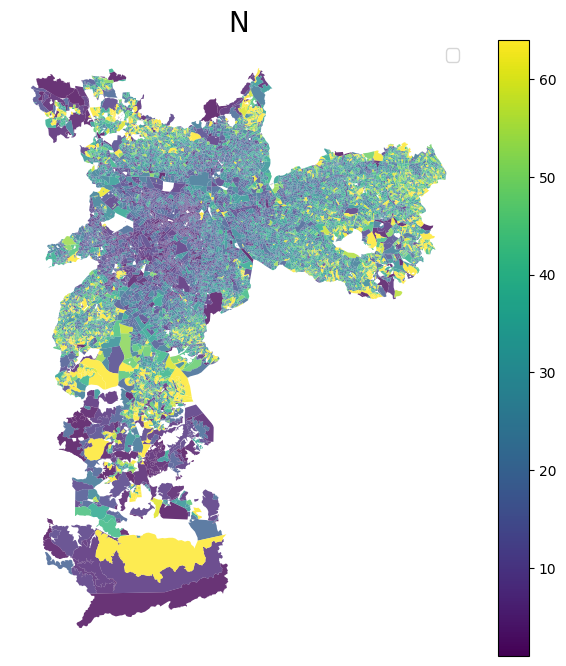

In [48]:
plot("n_people_15to17", geo_dem_census_df[geo_dem_census_df["city_name"] == "São Paulo"])

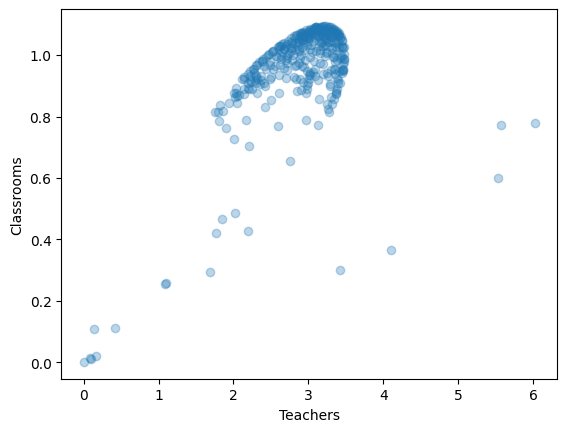

In [74]:
norm_access_df = geo_dem_census_df.set_index("sector_id").join(A.access_df[["e2sfca_n_classes","3sfca_n_classes", "e2sfca_n_teachers", "3sfca_n_teachers"]], how="left")
sp_df = norm_access_df[norm_access_df["city_name"] == "Araçatuba"]
plt.scatter(sp_df["3sfca_n_teachers"], sp_df["3sfca_n_classes"], alpha=0.3)
# set limits on the axes

plt.xlabel("Teachers")
plt.ylabel("Classrooms")
plt.show()

In [23]:
A.access_df.isna().sum()

n_people_15to17            0
2sfca30_n_teachers    301539
g2sfca_n_teachers     301539
3sfca_n_teachers      301539
dtype: int64

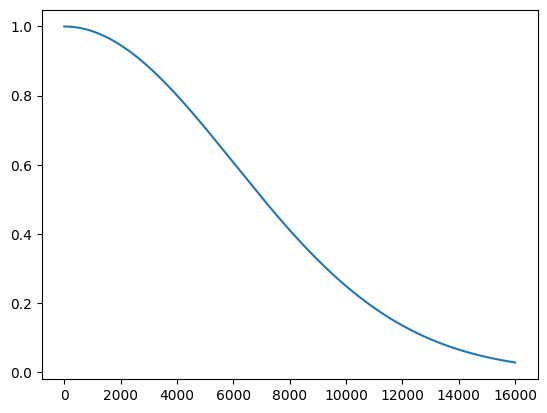

In [23]:
# Plot a gaussian function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 16000, 10000)
y = weights.gaussian(6000)(x)
plt.plot(x, y)